![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadística
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [147]:
import pandas as pd
import numpy as np

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [148]:
beers = pd.read_csv("data/datasets_beers.csv")

In [149]:
beers.head(10)

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [150]:
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


In [151]:
print(beers.columns)

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')


In [152]:
beers.shape
beers.ndim

2

In [153]:
# # SUSTITUIMOS LOS NAN DE IBU POR LA MEDIA
# beers["ibu"] = beers["ibu"].fillna(beers["ibu"].mean())
# beers

## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [154]:
beers.drop("Unnamed: 0", axis = 1,inplace = True)
beers

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [155]:
print(len(beers.index), "filas")
print(len(beers.columns), "columnas")

2410 filas
7 columnas


## Ejercicio 5
¿De qué tipo son los datos?

In [156]:
beers.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [157]:
beers_2 = beers.describe()
beers_2

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [158]:
beers["style"].nunique()

99

In [159]:
beers["style"].value_counts(normalize= True)

style
American IPA                      0.176299
American Pale Ale (APA)           0.101871
American Amber / Red Ale          0.055301
American Blonde Ale               0.044906
American Double / Imperial IPA    0.043659
                                    ...   
Wheat Ale                         0.000416
Grisette                          0.000416
Flanders Oud Bruin                0.000416
Braggot                           0.000416
Low Alcohol Beer                  0.000416
Name: proportion, Length: 99, dtype: float64

In [160]:
beers

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [161]:
beers.iloc[9:20,::]

,abv,ibu,id,name,style,brewery_id,ounces
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0


In [162]:
beers.iloc[9:20,3::]

,name,style,brewery_id,ounces
9,Cone Crusher,American Double / Imperial IPA,177,12.0
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0


In [163]:
beers.loc[9:19, ['abv', 'ibu', 'ounces']]

,abv,ibu,ounces
9,0.086,NaN,12.0
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0


In [164]:
array = (beers.loc[9:19, ['abv', 'ibu', 'ounces']]).to_numpy()
print(array)

[[ 0.086    nan 12.   ]
 [ 0.072    nan 12.   ]
 [ 0.073    nan 12.   ]
 [ 0.069    nan 12.   ]
 [ 0.085    nan 12.   ]
 [ 0.061 60.    12.   ]
 [ 0.06     nan 12.   ]
 [ 0.06     nan 12.   ]
 [ 0.06     nan 12.   ]
 [ 0.06     nan 12.   ]
 [ 0.082    nan 12.   ]]


## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [165]:
sum(beers["ounces"])

32757.300000000014

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [166]:
print(beers["ibu"].mean())
print(beers["ibu"].max())
print(beers["ibu"].min())

42.71316725978647
138.0
4.0


In [167]:
beers.loc[beers["ibu"].idxmax()]["name"]

'Bitter Bitch Imperial IPA'

In [168]:
beers.loc[beers["ibu"].idxmin()]["name"]

'Summer Solstice'

In [169]:
# IMPUTAR VALORES VACIOS EN IBU POR ESTILO, NO GENERAL
median_ibu_styles = beers.groupby("style")[["ibu"]].median()
median_ibu_styles

,ibu
style,
Abbey Single Ale,22.0
Altbier,36.5
American Adjunct Lager,9.0
American Amber / Red Ale,31.0
American Amber / Red Lager,23.0
...,...
Tripel,27.5
Vienna Lager,23.5
Wheat Ale,24.0


In [170]:
beers = beers.merge(median_ibu_styles, left_on = "style", right_index = True, how = "left")
beers

,abv,ibu_x,id,name,style,brewery_id,ounces,ibu_y
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,18.5
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,44.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,69.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,91.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,69.0
...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,61.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,31.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,30.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,44.0


In [171]:
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu_x       1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
 7   ibu_y       2353 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 150.8+ KB


In [172]:
beers["ibu_imputado"] = np.where (beers["ibu_x"].isnull(), beers["ibu_y"], beers["ibu_x"])
beers.fillna({"ibu_imputado" : beers["ibu_imputado"].median()}, inplace = True)
beers

,abv,ibu_x,id,name,style,brewery_id,ounces,ibu_y,ibu_imputado
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,18.5,18.5
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,44.0,44.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,69.0,69.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,91.0,91.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,69.0,69.0
...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,61.0,45.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,31.0,31.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,30.0,30.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,44.0,40.0


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [179]:
beers.rename(columns ={"ibu_x" : "ibu"}, inplace = True)

In [180]:
beers

,abv,ibu,id,name,style,brewery_id,ounces,ibu_y,ibu_imputado
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,18.5,18.5
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,44.0,44.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,69.0,69.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,91.0,91.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,69.0,69.0
...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,61.0,45.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,31.0,31.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,30.0,30.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,44.0,40.0


In [181]:
print(beers["ibu"].mean())
print(beers["ibu"].median())
print(beers["ibu"].mode()) #DEVUELVE UNA SERIE (0, 2O), EN ESTE CASO ES EL INDICE Y LA MODA. LA MODA EN SI ES SOLO EL 20, EL 0 ES INDICE.

42.71316725978647
35.0
0    20.0
Name: ibu, dtype: float64


In [182]:
rango_beers = beers["ibu"].max() - beers["ibu"].min()
rango_beers

np.float64(134.0)

In [183]:
print(beers["ibu"].std())
print(beers["ibu"].var())

25.954065911259317
673.6135373259929


In [185]:
# PARA QUEDARNOS CON EL 80% TOMAMOS EL 90% DE BASE (SIN EL 10% SUPERIOR) Y LE RESTAMOS EL 10% INFERIOR, ASÍ VEMOS QUE EL RANGO DEL 80% DEL MEDIO, ES MUHCO MENOR, 
# O SEA QUE HAY VALORES INFERIORES Y SUPERIORES MUY ALEJADOS
np.percentile(beers["ibu_imputado"],90) - np.percentile(beers["ibu_imputado"],10)

np.float64(57.0)

MEDIA: 42.71  
MODA: 20  
MEDIANA: 35
RANGO: 134 valores de rango  
DESVIACION TIPICA: 25.95  
VARIANZA: 673.61  

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonamiento mediante un gráfico

In [26]:
import seaborn as sns

In [196]:
corr = beers[["abv", "ibu", "ounces"]].corr(numeric_only = True)
corr

,abv,ibu,ounces
abv,1.000000,0.670621,0.172529
ibu,0.670621,1.000000,0.054691
ounces,0.172529,0.054691,1.000000


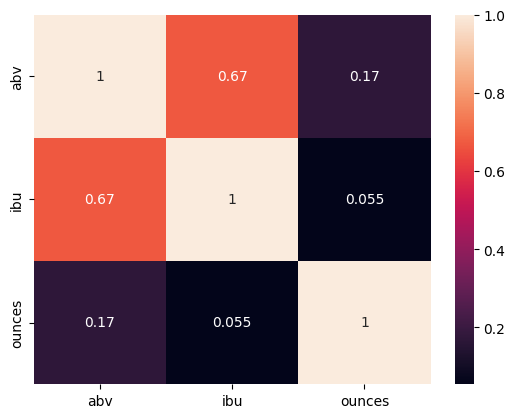

In [219]:
sns.heatmap(corr, annot = True);

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

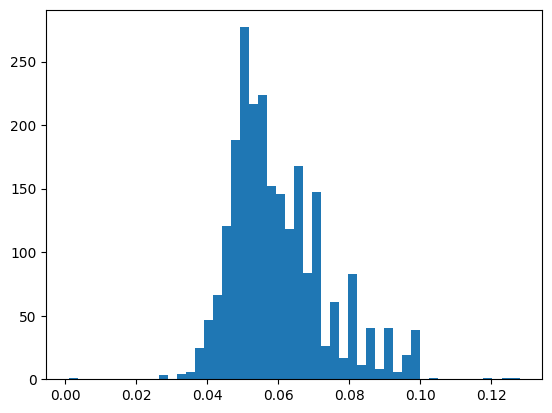

In [218]:
beers["abv"].hist(bins=50, grid = False);

distribución asimétrica

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

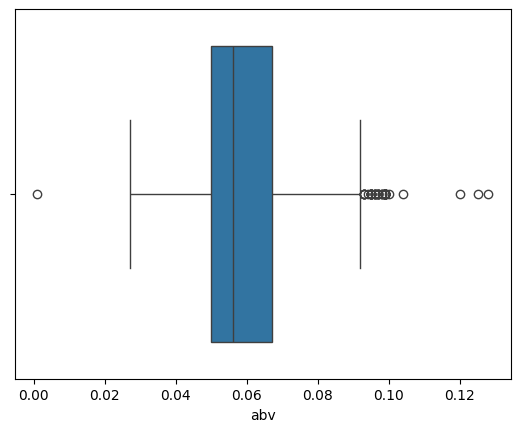

In [220]:
sns.boxplot(x = beers["abv"]);

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [31]:
beers.groupby('style')['abv'].mean().sort_values(ascending= False).iloc[:10]

style
English Barleywine                  0.107667
Quadrupel (Quad)                    0.104000
American Barleywine                 0.099000
American Malt Liquor                0.099000
Russian Imperial Stout              0.097636
American Double / Imperial Stout    0.093667
American Double / Imperial IPA      0.087369
Tripel                              0.086818
Baltic Porter                       0.085167
Belgian Strong Pale Ale             0.084000
Name: abv, dtype: float64

In [228]:
beers.groupby('style')['abv'].agg(["mean","count"]).sort_values("mean", ascending= False).iloc[:10]

,mean,count
style,,
English Barleywine,0.107667,3
Quadrupel (Quad),0.104000,4
American Barleywine,0.099000,3
American Malt Liquor,0.099000,1
Russian Imperial Stout,0.097636,11
American Double / Imperial Stout,0.093667,9
American Double / Imperial IPA,0.087369,103
Tripel,0.086818,11
Baltic Porter,0.085167,6


In [32]:
beers.groupby('style')['abv'].mean().idxmax()

'English Barleywine'

In [33]:
beers.groupby('style')['ibu'].mean().sort_values(ascending = False).iloc[:10]

style
American Double / Imperial IPA        78.860905
American Barleywine                   78.237722
Russian Imperial Stout                74.558137
English Barleywine                    66.666667
American Double / Imperial Pilsner    63.856584
American India Pale Lager             63.333333
American Strong Ale                   62.173310
American IPA                          60.404999
American Black Ale                    57.261408
English Stout                         54.356584
Name: ibu, dtype: float64

In [34]:
beers.groupby('style')['ibu'].mean().idxmax()

'American Double / Imperial IPA'

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [229]:
breweries = pd.read_csv("data/datasets_breweries.csv")
breweries

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra también la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [231]:
breweries.rename(columns={'Unnamed: 0': 'brewery_id', 'name': 'Brewery name'}, inplace= True)
breweries

,brewery_id,Brewery name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 18
Junta los dos datasets que tienes

In [248]:
# beers.drop(beers["ibu_y"])
combinado = pd.merge(beers, breweries, on="brewery_id", how ="left")
combinado

,abv,ibu,id,name,style,brewery_id,ounces,ibu_y,ibu_imputado,Brewery name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,18.5,18.5,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,44.0,44.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,69.0,69.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,91.0,91.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,69.0,69.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,61.0,45.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,31.0,31.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,30.0,30.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,44.0,40.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [38]:
combinado["state"].nunique()

51

In [39]:
combinado["city"].nunique()

384

In [252]:
combinado["Brewery name"].nunique()

551

In [264]:
len(combinado["Brewery name"].drop_duplicates())

551

In [259]:
breweries["Brewery name"].value_counts().head(10)
# HAY 7 CERVECERÍAS CON EL MISMO NOMBRE

Brewery name
Sly Fox Brewing Company          2
Oskar Blues Brewery              2
Blackrocks Brewery               2
Otter Creek Brewing              2
Summit Brewing Company           2
Lucette Brewing Company          2
Blue Mountain Brewery            2
Arcadia Brewing Company          1
Tapistry Brewing                 1
Sleeping Lady Brewing Company    1
Name: count, dtype: int64

In [261]:
serie_breweries = breweries["Brewery name"].value_counts()
serie_breweries [serie_breweries > 1].index

Index(['Sly Fox Brewing Company', 'Oskar Blues Brewery', 'Blackrocks Brewery',
       'Otter Creek Brewing', 'Summit Brewing Company',
       'Lucette Brewing Company', 'Blue Mountain Brewery'],
      dtype='object', name='Brewery name')

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [265]:
combinado.groupby(["state","city"])["abv"].agg(["mean", "median","max"])

mean  median    max
state city                               
AK    Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
AL    Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
WI    Wilson      0.055000  0.0550  0.055
WV    Lewisburg   0.062000  0.0620  0.067
WY    Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[401 rows x 3 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [273]:
combinado[combinado["state"].str.contains("IN")].loc[1,"state"]

' IN'

In [277]:
combinado[combinado["state"].str.contains("IN")].sort_values(by='ibu', ascending=False)

,abv,ibu,id,name,style,brewery_id,ounces,ibu_y,ibu_imputado,Brewery name,city,state
479,0.099,115.0,2471,Hopkick Dropkick,American Double / Imperial IPA,24,12.0,91.0,115.0,Burn 'Em Brewing,Michigan City,IN
2191,0.085,115.0,1449,Overlord Imperial IPA,American Double / Imperial IPA,17,16.0,91.0,115.0,Tin Man Brewing Company,Evansville,IN
811,0.060,104.0,1610,Half Cycle IPA,American IPA,16,16.0,69.0,104.0,Flat 12 Bierwerks,Indianapolis,IN
2062,0.091,91.0,651,Isis,American Double / Imperial IPA,25,16.0,91.0,91.0,Sun King Brewing Company,Indianapolis,IN
2189,0.120,90.0,2621,Csar,Russian Imperial Stout,17,16.0,94.0,90.0,Tin Man Brewing Company,Evansville,IN
...,...,...,...,...,...,...,...,...,...,...,...,...
2056,0.070,NaN,934,The Deuce,American Brown Ale,25,16.0,26.0,26.0,Sun King Brewing Company,Indianapolis,IN
2061,0.080,NaN,660,Chaka,Belgian Strong Pale Ale,25,16.0,25.0,25.0,Sun King Brewing Company,Indianapolis,IN
2190,0.055,NaN,1817,Klingon Warnog Roggen Dunkel,Roggenbier,17,16.0,20.0,20.0,Tin Man Brewing Company,Evansville,IN
2277,0.060,NaN,1950,Dragonfly IPA,American IPA,202,16.0,69.0,69.0,Upland Brewing Company,Bloomington,IN


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [279]:
combinado.groupby("city")["ibu_imputado"].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.0,135.00,135.0,135.00,135.0
Abita Springs,3.0,27.333333,21.455380,13.0,15.00,17.0,34.50,52.0
Ada,1.0,32.000000,NaN,32.0,32.00,32.0,32.00,32.0
Afton,4.0,43.000000,19.899749,22.0,28.00,45.0,60.00,60.0
Airway Heights,5.0,18.800000,4.309872,12.0,18.50,18.5,22.00,23.0
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.0,39.75,44.0,51.00,72.0
Worcester,1.0,69.000000,NaN,69.0,69.00,69.0,69.00,69.0
Yakima,2.0,54.000000,22.627417,38.0,46.00,54.0,62.00,70.0


## Ejercicio 23
Consigue en un DataFrame de todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [282]:
combinado[combinado["abv"] >= 0.07].sort_values(by = "name")

,abv,ibu,id,name,style,brewery_id,ounces,ibu_y,ibu_imputado,Brewery name,city,state
2382,0.071,60.0,2148,#002 American I.P.A.,American IPA,211,12.0,69.0,60.0,Wisconsin Brewing Company,Verona,WI
550,0.078,80.0,1940,077XX,American Double / Imperial IPA,222,16.0,91.0,80.0,Carton Brewing Company,Atlantic Highlands,NJ
2332,0.070,NaN,2222,10 Ton,Oatmeal Stout,94,16.0,29.0,29.0,Warped Wing Brewing Company,Dayton,OH
1906,0.070,113.0,24,113 IPA,American IPA,371,12.0,69.0,113.0,Sly Fox Brewing Company,Pottstown,PA
1767,0.076,78.0,1577,12th Round,American Strong Ale,376,16.0,70.0,78.0,RoughTail Brewing Company,Midwest City,OK
...,...,...,...,...,...,...,...,...,...,...,...,...
954,0.095,75.0,2644,Yeti Imperial Stout,Russian Imperial Stout,6,12.0,94.0,75.0,Great Divide Brewing Company,Denver,CO
433,0.090,NaN,1266,Zaison,Saison / Farmhouse Ale,10,16.0,30.0,30.0,Brewery Vivant,Grand Rapids,MI
443,0.090,NaN,671,Zaison (2012),Saison / Farmhouse Ale,10,16.0,30.0,30.0,Brewery Vivant,Grand Rapids,MI
1563,0.085,NaN,992,oSKAr the G'Rauch,American IPA,166,16.0,69.0,69.0,Oskar Blues Brewery,Longmont,CO


Lo hice mal, entendi que cualquier cerveza q tuviera minimo de 0.7. Y la pregunta era que en qué cervecerías hay al menos una cerveza con 0.7 de abv, y de esas, poner tdas las cervezas aunque no cumplan ese minimo pero si compartan cerveceria

In [286]:
cervecerias = combinado[combinado["abv"] >= 0.07]["brewery_id"].unique()
combinado[combinado["brewery_id"].isin(cervecerias)]

,abv,ibu,id,name,style,brewery_id,ounces,ibu_y,ibu_imputado,Brewery name,city,state
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,44.0,44.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,69.0,69.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,91.0,91.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,69.0,69.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,29.0,29.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,61.0,45.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,31.0,31.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,30.0,30.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,44.0,40.0,Wynkoop Brewing Company,Denver,CO


In [289]:
brews = combinado.groupby("brewery_id")["abv"].max()
cervecerias = brews[brews >=0.07].index
combinado[combinado["brewery_id"].isin(cervecerias)]

,abv,ibu,id,name,style,brewery_id,ounces,ibu_y,ibu_imputado,Brewery name,city,state
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,44.0,44.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,69.0,69.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,91.0,91.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,69.0,69.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,29.0,29.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,61.0,45.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,31.0,31.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,30.0,30.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,44.0,40.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [295]:
# MEDIA GLOBAL
amargor = combinado['ibu'].mean()

In [294]:
# MEDIA DE CADA ESTADO
estados = combinado.groupby("state")["ibu"].mean()

In [300]:
# LISTADO DE ESTADOS CON MAYOR MEDIA QUE EL GLOBAL
listado = estados[estados > amargor].index
listado

Index([' AL', ' CA', ' CO', ' DC', ' DE', ' FL', ' GA', ' ID', ' IN', ' ME',
       ' MN', ' MS', ' NC', ' NH', ' NJ', ' NM', ' NV', ' NY', ' OH', ' OR',
       ' UT', ' VA', ' WA', ' WV'],
      dtype='object', name='state')

In [301]:
combinado[combinado["state"].isin(listado)]

,abv,ibu,id,name,style,brewery_id,ounces,ibu_y,ibu_imputado,Brewery name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,18.5,18.5,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,44.0,44.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,69.0,69.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,91.0,91.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,69.0,69.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,61.0,45.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,31.0,31.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,30.0,30.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,44.0,40.0,Wynkoop Brewing Company,Denver,CO
